<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
cancer = pd.read_csv(breast_cancer_csv, index_col='id')
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA

Explore dataset. Clean data. Find correlation.

In [7]:
cancer = cancer.drop('Unnamed: 32', axis = 1)
print(cancer.head())

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_

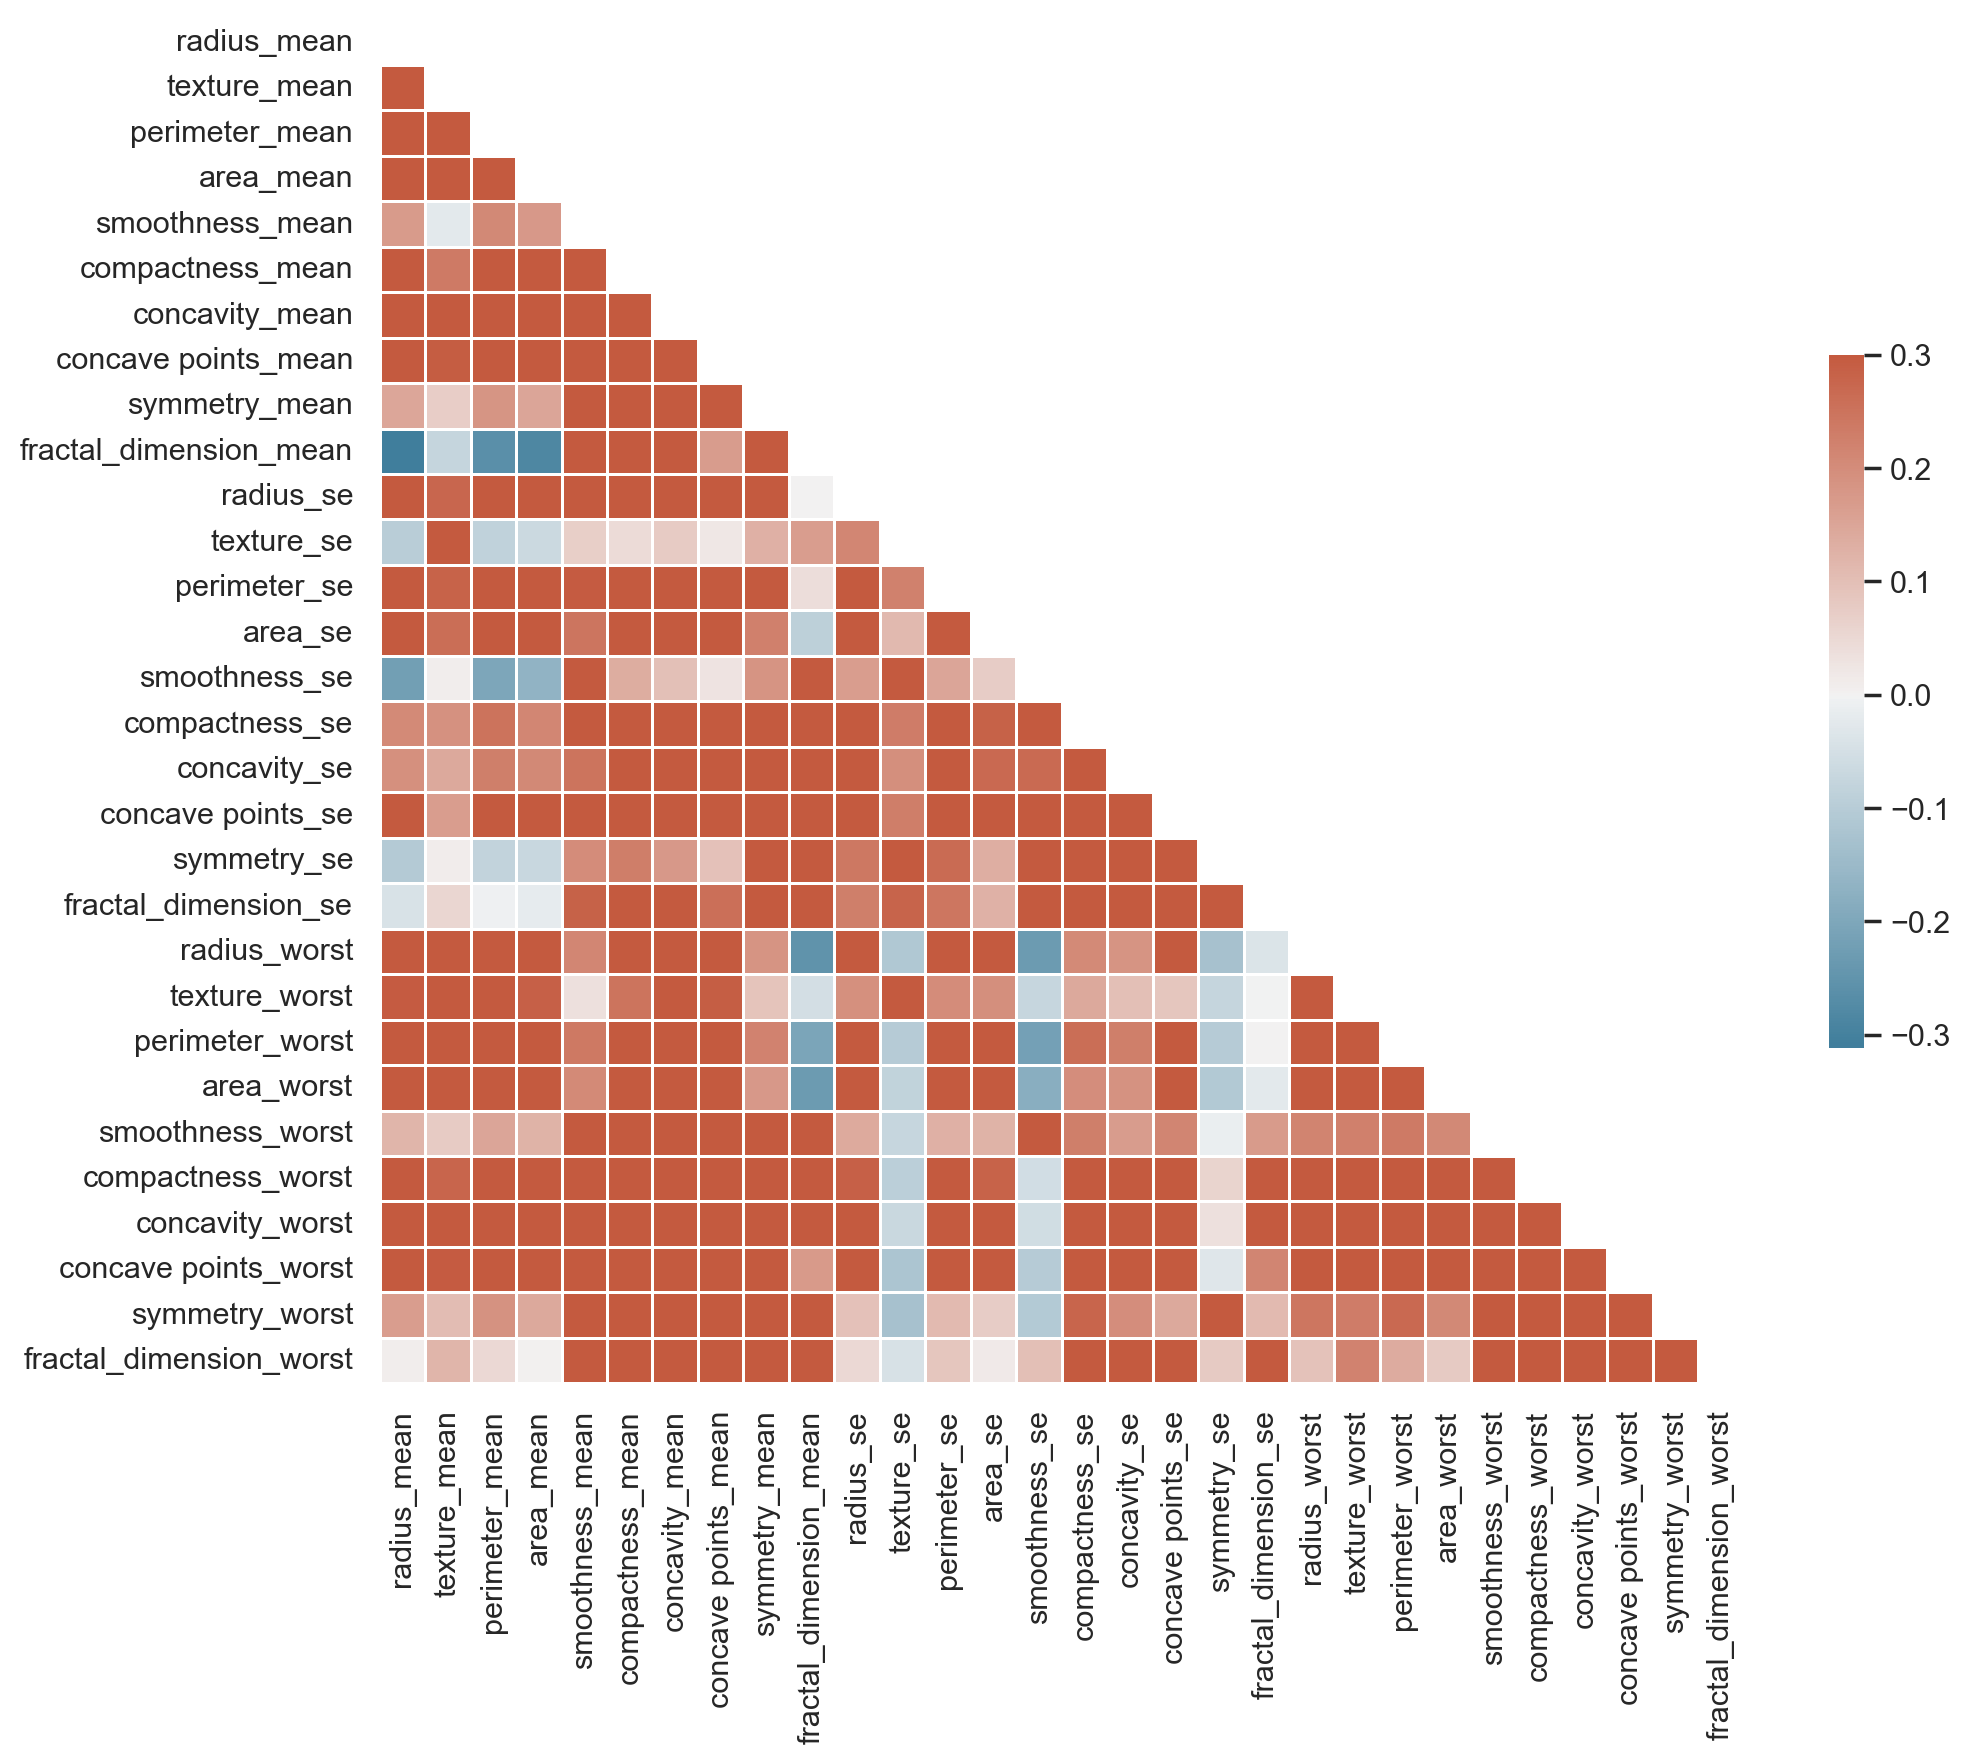

In [9]:
# Check the correlation of numerical variables
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = cancer.corr(numeric_only = True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [12]:
# ANSWER
# Set up target and predictor variable
y = cancer['diagnosis']

In [14]:
# Check the total number based on different classes
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [16]:
# Convert to integer 0 and 1
mapping = {'B': 0, 'M' : 1} 
y_map = y.map(mapping)
y_map.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### 4. What is the baseline accuracy?

#### Baseline accuracy is usually the accuracy you’d get by making the most naive prediction possible — often by predicting the most frequent class for all samples in your dataset. It helps you compare whether your machine learning model is doing better than a "do-nothing" approach.

In [20]:
# ANSWER
count_1 = y_map.value_counts()[0]

# Baseline Accuracy
count_1 / len(y_map) 

0.6274165202108963

### 5. Choose features to be your predictor variables and set up your X.

In [23]:
# ANSWER
# Set up the predictor variables
X = cancer.drop('diagnosis' , axis = 1)

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [26]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors = 1)
# fit on the unstandardized data:
knn.fit(X, y_map)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [29]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
# use this to compute the accuracy
y_pred = knn.predict(X)
accuracy = accuracy_score(y_map, y_pred)
print(accuracy)

1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [32]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y_map, test_size=0.2, random_state=42, stratify=y)
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
# STEP 3: test the model on the testing set, and check the accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8947368421052632


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [35]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn_1 = KNeighborsClassifier(n_neighbors = X_train.shape[0])
# Fit Train Data
knn_1.fit(X_train, y_train)
# Print accuracy_score
y_pred = knn_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.631578947368421


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

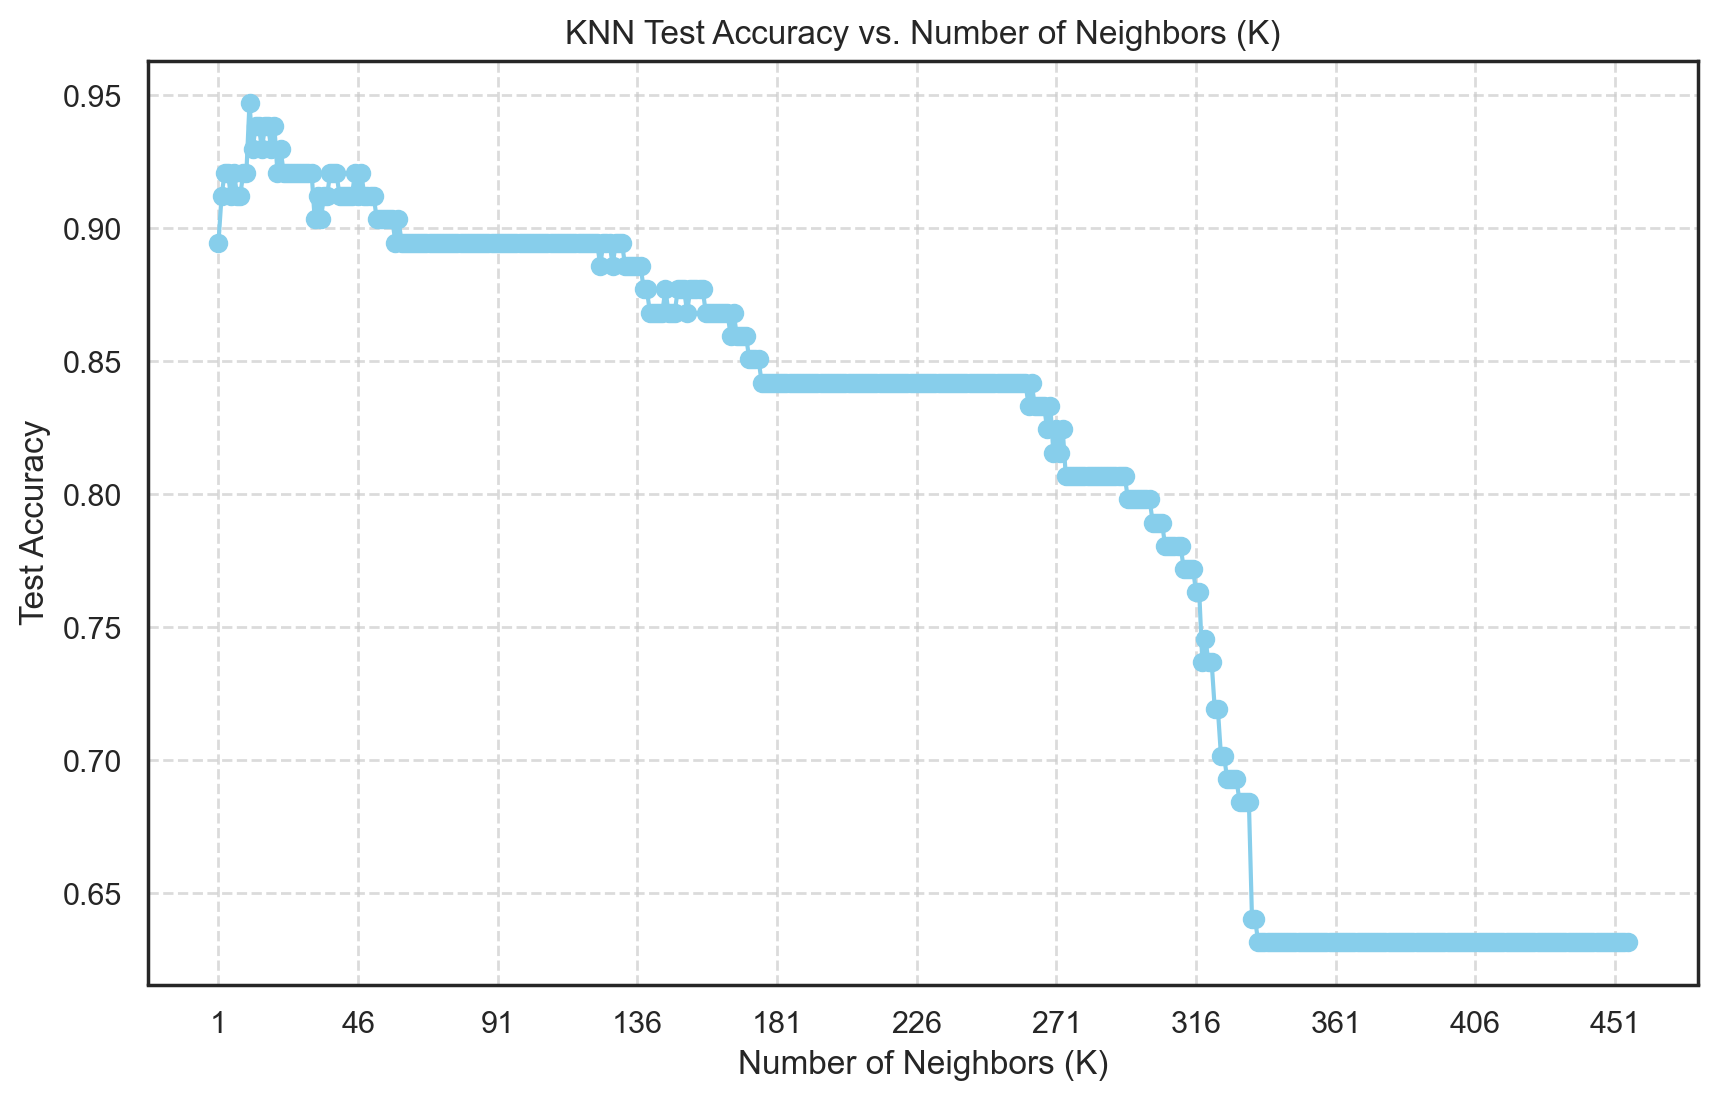

In [38]:
# ANSWER
# plot test accuracy by number of neighbors:
k = range( 1, X_train.shape[0] +1 )
test_accuracy = []

for i in k :
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracy.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k, test_accuracy, marker='o', linestyle='-', color='skyblue')
plt.title('KNN Test Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(1, X_train.shape[0] + 1, max(1, X_train.shape[0] // 10))) # Adjust x-ticks for readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [41]:
# ANSWER
k = range(1 , 30)
cv_scores = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X, y, cv=5, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    print(f"K={i}: Mean accuracy = {scores.mean():.4f}")
    print("-" * 50)

K=1: Mean accuracy = 0.9051
--------------------------------------------------
K=2: Mean accuracy = 0.9086
--------------------------------------------------
K=3: Mean accuracy = 0.9191
--------------------------------------------------
K=4: Mean accuracy = 0.9227
--------------------------------------------------
K=5: Mean accuracy = 0.9279
--------------------------------------------------
K=6: Mean accuracy = 0.9209
--------------------------------------------------
K=7: Mean accuracy = 0.9262
--------------------------------------------------
K=8: Mean accuracy = 0.9262
--------------------------------------------------
K=9: Mean accuracy = 0.9315
--------------------------------------------------
K=10: Mean accuracy = 0.9262
--------------------------------------------------
K=11: Mean accuracy = 0.9297
--------------------------------------------------
K=12: Mean accuracy = 0.9315
--------------------------------------------------
K=13: Mean accuracy = 0.9332
--------------------

In [43]:
# Find the optimum K and corresponding accuracy
optimal_k_index = np.argmax(cv_scores)
optimal_k = k[optimal_k_index]
optimal_accuracy = cv_scores[optimal_k_index]
print(f"The optimal value for K is {optimal_k} with a mean cross-validated accuracy of {optimal_accuracy:.4f}")
print("-" * 50)

The optimal value for K is 14 with a mean cross-validated accuracy of 0.9350
--------------------------------------------------


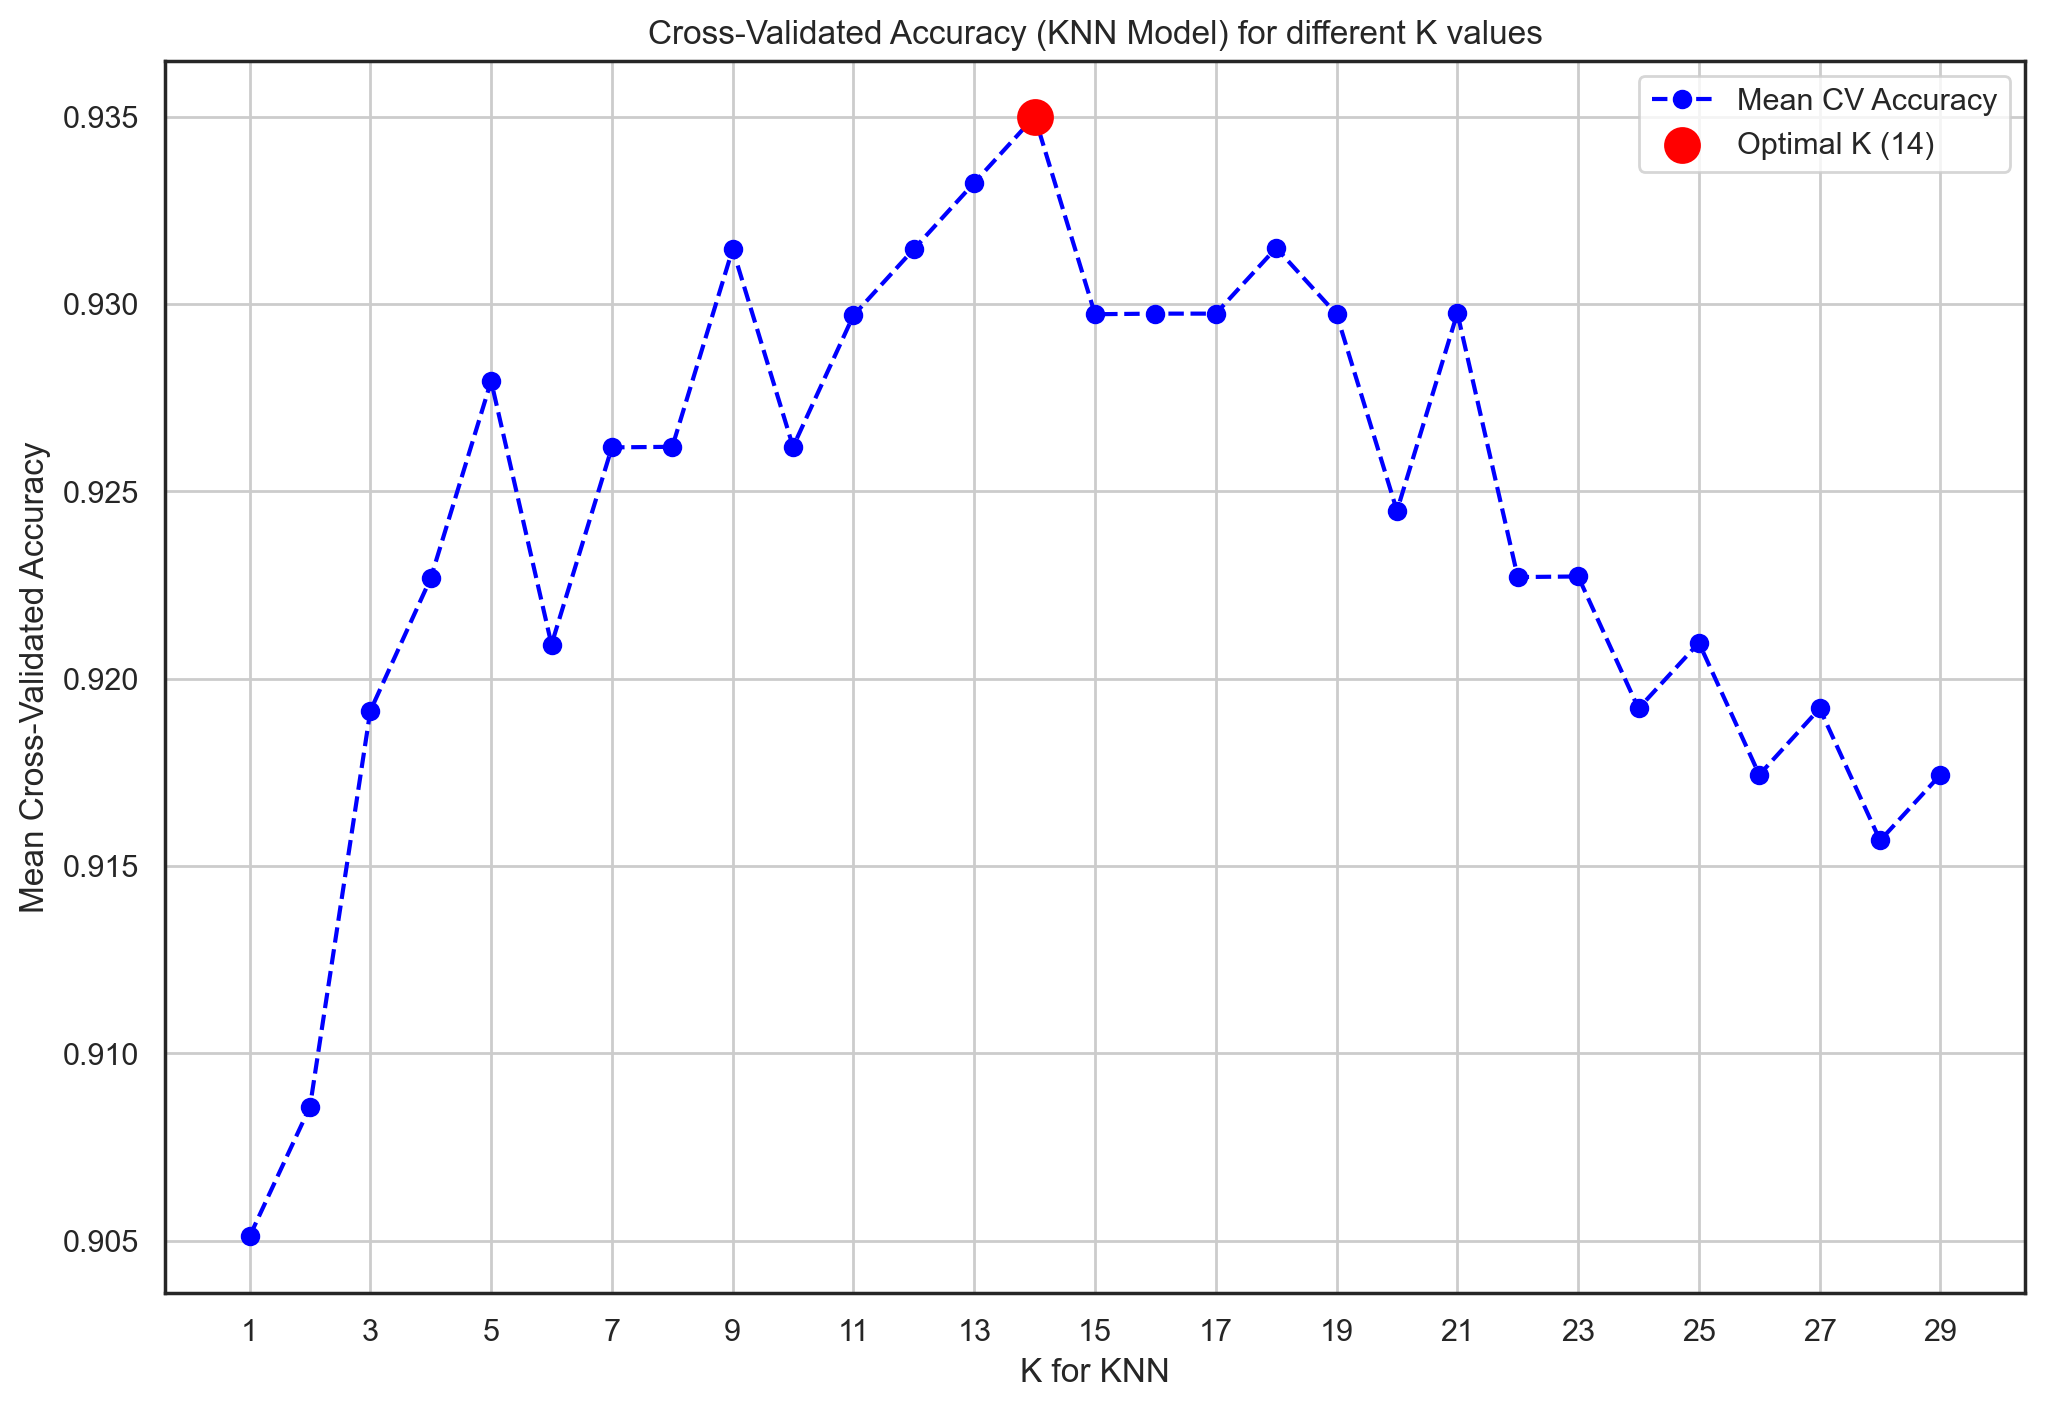

In [45]:
# Plot the graph
plt.figure(figsize=(12, 8))
plt.plot(k, cv_scores, marker='o', linestyle='--', color='blue', label='Mean CV Accuracy')
plt.scatter(optimal_k, optimal_accuracy, color='red', s=150, zorder=5, label=f'Optimal K ({optimal_k})')

# Add labels and title for clarity
plt.title("Cross-Validated Accuracy (KNN Model) for different K values")
plt.xlabel("K for KNN")
plt.ylabel("Mean Cross-Validated Accuracy")
plt.xticks(np.arange(1, 31, 2))  # Set x-ticks for better readability
plt.legend()
plt.grid(True)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [48]:
# ANSWER
# Standarize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = range(1 , 30)
cv_scores = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    print(f"K={i}: Mean accuracy = {scores.mean():.4f}")
    print("-" * 50)

K=1: Mean accuracy = 0.9508
--------------------------------------------------
K=2: Mean accuracy = 0.9543
--------------------------------------------------
K=3: Mean accuracy = 0.9578
--------------------------------------------------
K=4: Mean accuracy = 0.9631
--------------------------------------------------
K=5: Mean accuracy = 0.9649
--------------------------------------------------
K=6: Mean accuracy = 0.9684
--------------------------------------------------
K=7: Mean accuracy = 0.9684
--------------------------------------------------
K=8: Mean accuracy = 0.9649
--------------------------------------------------
K=9: Mean accuracy = 0.9684
--------------------------------------------------
K=10: Mean accuracy = 0.9649
--------------------------------------------------
K=11: Mean accuracy = 0.9631
--------------------------------------------------
K=12: Mean accuracy = 0.9631
--------------------------------------------------
K=13: Mean accuracy = 0.9649
--------------------

In [50]:
# Find the optimum K and corresponding accuracy
optimal_k_index = np.argmax(cv_scores)
optimal_k = k[optimal_k_index]
optimal_accuracy = cv_scores[optimal_k_index]
print(f"The optimal value for K is {optimal_k} with a mean cross-validated accuracy of {optimal_accuracy:.4f}")
print("-" * 50)

The optimal value for K is 9 with a mean cross-validated accuracy of 0.9684
--------------------------------------------------


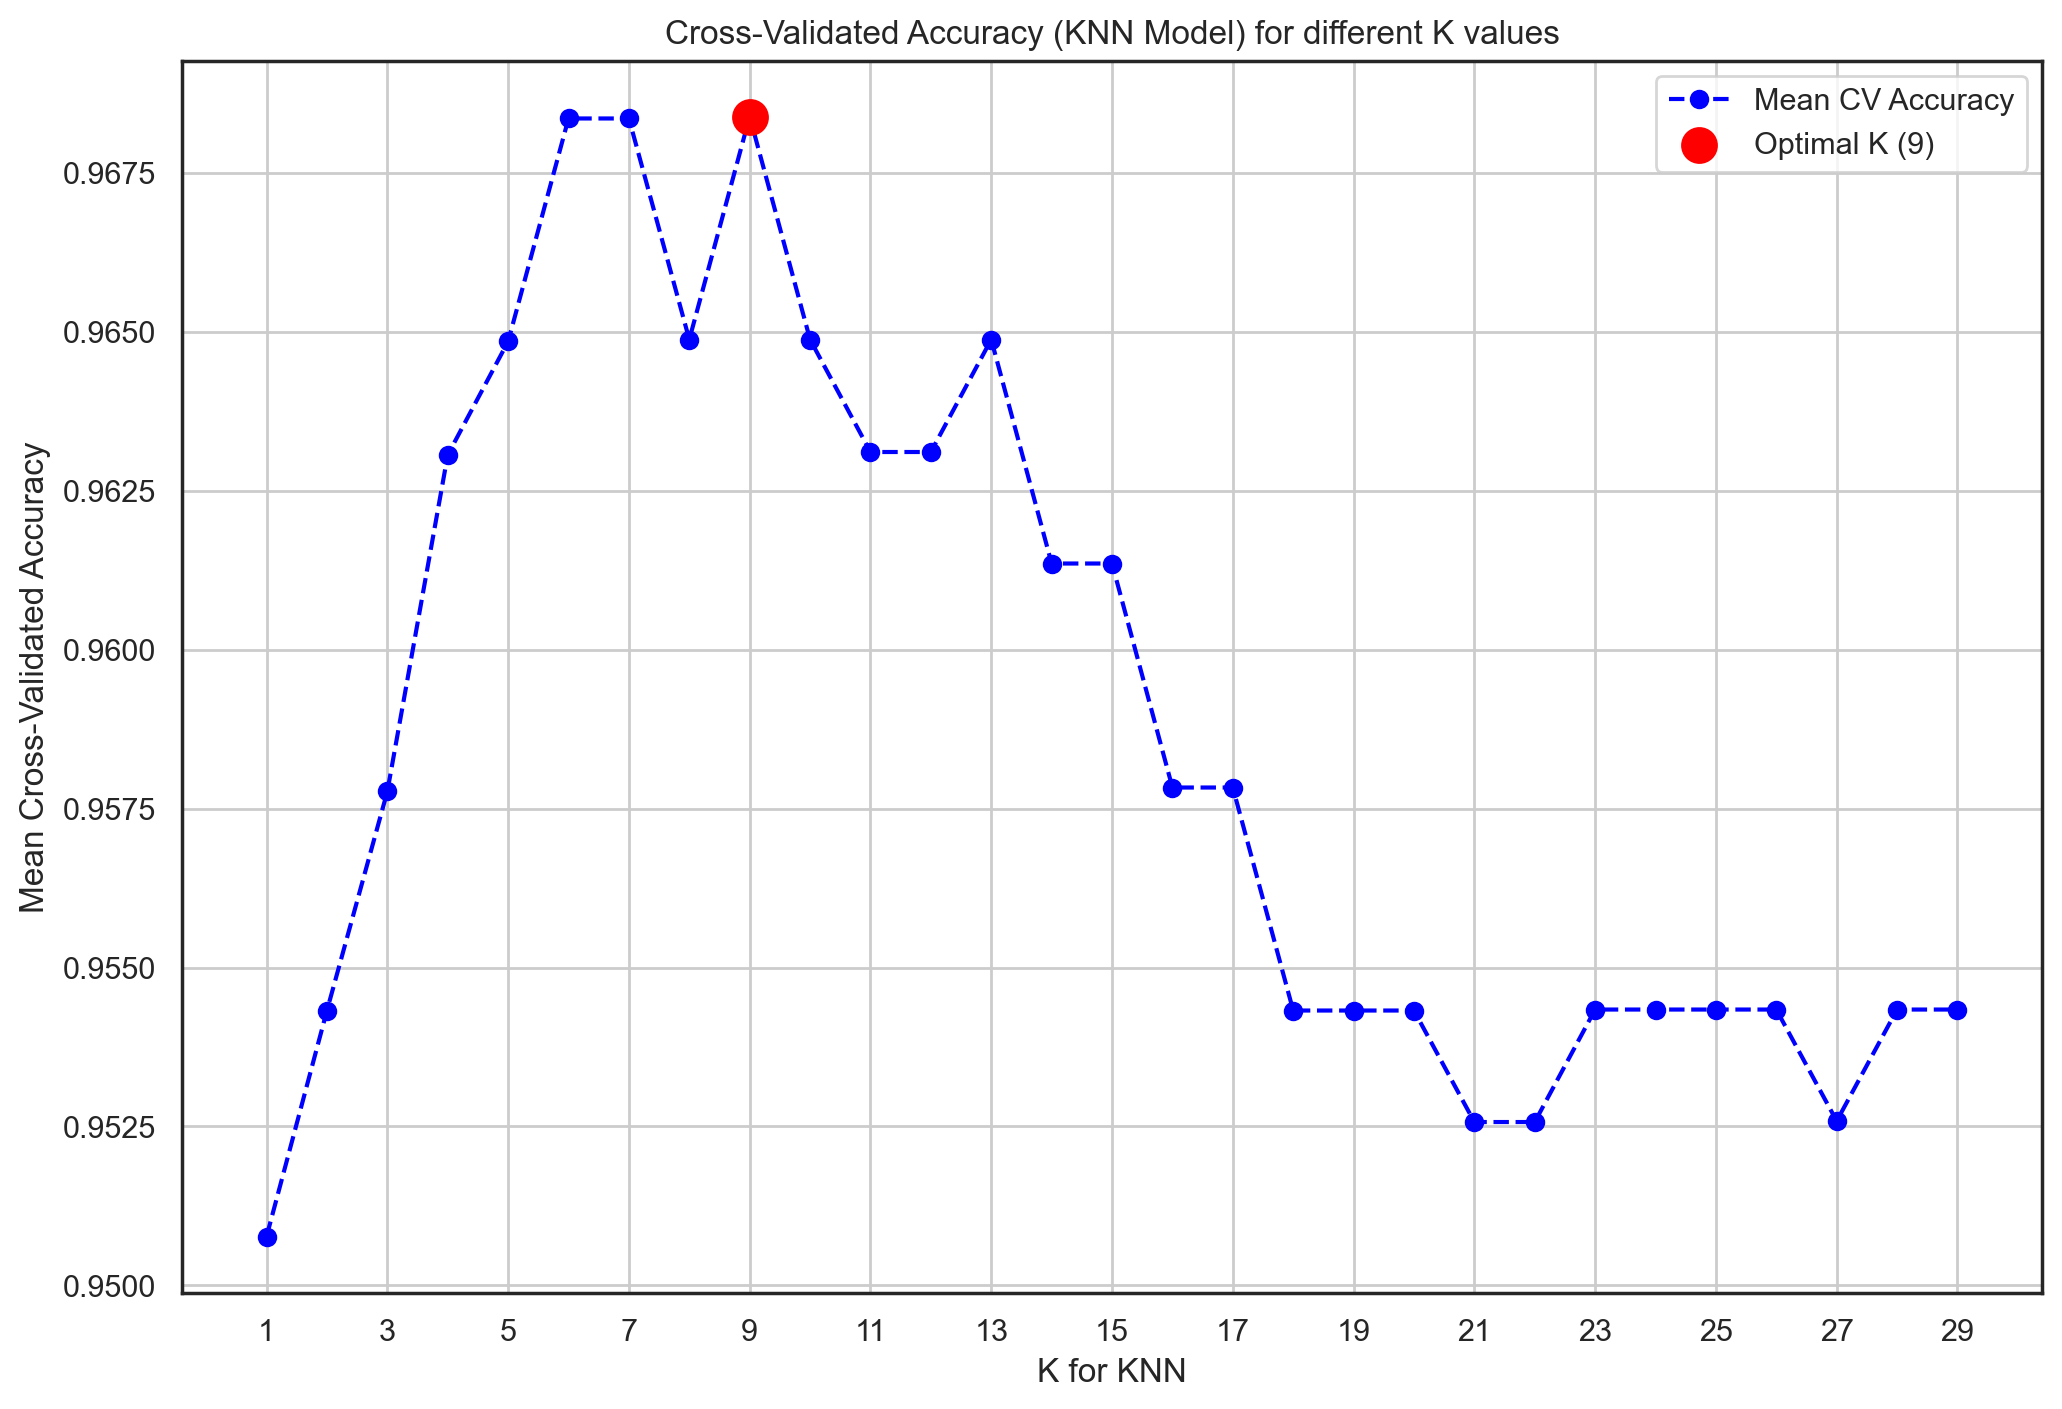

In [52]:
# ANSWER
# plot test accuracy by number of neighbors:
plt.figure(figsize=(12, 8))
plt.plot(k, cv_scores, marker='o', linestyle='--', color='blue', label='Mean CV Accuracy')
plt.scatter(optimal_k, optimal_accuracy, color='red', s=150, zorder=5, label=f'Optimal K ({optimal_k})')

# Add labels and title for clarity
plt.title("Cross-Validated Accuracy (KNN Model) for different K values")
plt.xlabel("K for KNN")
plt.ylabel("Mean Cross-Validated Accuracy")
plt.xticks(np.arange(1, 31, 2))  # Set x-ticks for better readability
plt.legend()
plt.grid(True)
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



